In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df  = pd.read_csv('./data.csv')
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45987 non-null  object 
 3   category_list         45475 non-null  object 
 4    market               45468 non-null  object 
 5    funding_total_usd    49434 non-null  object 
 6   status                48120 non-null  object 
 7   country_code          44162 non-null  object 
 8   state_code            30159 non-null  object 
 9   region                44162 non-null  object 
 10  city                  43319 non-null  object 
 11  funding_rounds        49434 non-null  float64
 12  founded_at            38551 non-null  object 
 13  founded_month         38479 non-null  object 
 14  founded_quarter       38479 non-null  object 
 15  founded_year       

In [47]:
df_copy = df.copy()

In [8]:
df.rename(columns={' funding_total_usd ': "funding_total_usd",
                    ' market ': "market"},inplace=True)

### Missing data

In [5]:
CATEGORICAL = list(filter(lambda x: df[x].dtype=='object',df.columns))
def show_stats(columns):
    stat = {}
    for col in columns:
        stat[col] =  [df[col].nunique(), df[col].isna().sum(), df[col].dtype]
    return pd.DataFrame.from_dict(stat, orient='index', columns=['Unique',  'Missed values in %', 'DType'])
show_stats(CATEGORICAL)

,Unique,Missed values in %,DType
permalink,49436,0,object
name,49349,1,object
homepage_url,45848,3451,object
category_list,16674,3963,object
market,753,3970,object
funding_total_usd,14617,4,object
status,3,1318,object
country_code,115,5276,object
state_code,61,19279,object
region,1089,5276,object


covert các cột datetime

In [6]:
df[['founded_at','first_funding_at','last_funding_at']].head()

,founded_at,first_funding_at,last_funding_at
0,01/06/2012,30/06/2012,30/06/2012
1,NaN,04/06/2010,23/09/2010
2,26/10/2012,09/08/2012,09/08/2012
3,01/04/2011,01/04/2011,01/04/2011
4,01/01/2014,17/08/2014,26/09/2014


In [7]:
format_date = ('founded_at','first_funding_at','last_funding_at')
for i in format_date:
  df[i] = pd.to_datetime(df[i], errors = 'coerce')

In [8]:
#Để giảm độ phức tạp, trong khi xử lý các trường biến ngày, chuyển đổi ngày thực tế thành ngày tương đối, mô tả khoảng cách từ khi thành lập đến lần cấp vốn đầu tiên và cuối cùng, sau đó bỏ ngày thành lập.

df['age_first_funding'] = (df['first_funding_at']-df['founded_at'])/pd.Timedelta(days=365)
df['age_last_funding'] = (df['last_funding_at']-df['founded_at'])/pd.Timedelta(days=365)
df['founded_month'] = pd.DatetimeIndex(df['founded_at']).month
df['founded_quarter'] = pd.DatetimeIndex(df['founded_at']).quarter

In [9]:
df.isnull().sum()

permalink                   0
name                        1
homepage_url             3451
category_list            3963
market                   3970
funding_total_usd           4
status                   1318
country_code             5276
state_code              19279
region                   5276
city                     6119
funding_rounds              4
founded_at              10888
founded_month           10888
founded_quarter         10888
founded_year            10959
first_funding_at           14
last_funding_at            10
seed                        4
venture                     4
equity_crowdfunding         4
undisclosed                 4
convertible_note            4
debt_financing              4
angel                       4
grant                       4
private_equity              4
post_ipo_equity             4
post_ipo_debt               4
secondary_market            4
product_crowdfunding        4
round_A                     4
round_B                     4
round_C   

xoá các cột không cần thiết

In [10]:
df = df.drop(['permalink','homepage_url' ,'state_code','region','city','founded_at','first_funding_at','last_funding_at','category_list' ], axis = 1)

xoá tất cả các dupplicate 

In [11]:
df = df.drop_duplicates()
df.shape

(49437, 32)

Xu li cac cut numeric

In [12]:
show_stats(list(filter(lambda x: df[x].dtype=='float64',df.columns)))

,Unique,Missed values in %,DType
funding_rounds,17,3,float64
founded_month,12,10887,float64
founded_quarter,4,10887,float64
founded_year,103,10958,float64
seed,3337,3,float64
venture,9300,3,float64
equity_crowdfunding,252,3,float64
undisclosed,687,3,float64
convertible_note,299,3,float64
debt_financing,1872,3,float64


In [13]:
df[['founded_month','founded_quarter','founded_year']].head()

,founded_month,founded_quarter,founded_year
0,1.0,1.0,2012.0
1,NaN,NaN,NaN
2,10.0,4.0,2012.0
3,1.0,1.0,2011.0
4,1.0,1.0,2014.0


41k data là khá lớn, hoàn toàn có thể drop null

In [14]:
df = df.dropna()
df.shape

(33146, 32)

In [15]:
df.isnull().sum().sum()

0

Data Transformation

In [16]:
df.head()

,name,market,funding_total_usd,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding
0,#waywire,News,"17,50,000",acquired,USA,1.0,1.0,1.0,2012.0,1750000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482192,0.482192
2,'Rock' Your Paper,Publishing,"40,000",operating,EST,1.0,10.0,4.0,2012.0,40000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.131507,-0.131507
3,(In)Touch Network,Electronics,"15,00,000",operating,GBR,1.0,1.0,1.0,2011.0,1500000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,-R- Ranch and Mine,Tourism,"60,000",operating,USA,2.0,1.0,1.0,2014.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247
8,004 Technologies,Software,-,operating,USA,1.0,1.0,1.0,2010.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644


Xem giá trị khác nhau của từng cột

In [17]:

num_unique_country_code = df['country_code'].nunique()
num_unique_market = df['market'].nunique()
num_unique_status = df['status'].nunique()

print("Số lượng giá trị khác nhau trong cột 'market':", num_unique_market)
print("Số lượng giá trị khác nhau trong cột 'country_code':", num_unique_country_code)
print("Số lượng giá trị khác nhau trong cột 'status':", num_unique_status)

Số lượng giá trị khác nhau trong cột 'market': 720
Số lượng giá trị khác nhau trong cột 'country_code': 109
Số lượng giá trị khác nhau trong cột 'status': 3


Hiển thị phân phối của các giá trị

In [18]:

market_distribution = df['market'].value_counts().reset_index()
market_distribution.columns = ['market', 'count']
print("\nPhân phối của các giá trị trong cột 'market':\n", market_distribution)


Phân phối của các giá trị trong cột 'market':
                     market  count
0                Software    3524
1           Biotechnology    2361
2                  Mobile    1425
3              E-Commerce    1262
4             Curated Web    1163
..                     ...    ...
715               Eyewear       1
716       Gift Registries       1
717                Carbon       1
718              Swimming       1
719   Clean Technology IT       1

[720 rows x 2 columns]


Gom nhóm các giá trị ít xuất hiện

In [19]:
# Chọn ngưỡng
threshold = 200

# Lấy các giá trị hiếm xuất hiện
rare_values = df['market'].value_counts()[df['market'].value_counts() < threshold].index

# Gom nhóm các giá trị hiếm xuất hiện lại thành 'Others'
df.loc[df['market'].isin(rare_values), 'market'] = 'Others'


In [20]:
df.head()

,name,market,funding_total_usd,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding
0,#waywire,News,"17,50,000",acquired,USA,1.0,1.0,1.0,2012.0,1750000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482192,0.482192
2,'Rock' Your Paper,Others,"40,000",operating,EST,1.0,10.0,4.0,2012.0,40000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.131507,-0.131507
3,(In)Touch Network,Others,"15,00,000",operating,GBR,1.0,1.0,1.0,2011.0,1500000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,-R- Ranch and Mine,Others,"60,000",operating,USA,2.0,1.0,1.0,2014.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247
8,004 Technologies,Software,-,operating,USA,1.0,1.0,1.0,2010.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644


Xét cột country_code

In [21]:
country_code_distribution = df['country_code'].value_counts().reset_index()
country_code_distribution.columns = ['country_code', 'count']
print("\nPhân phối của các giá trị trong cột 'country_code':\n", country_code_distribution)


Phân phối của các giá trị trong cột 'country_code':
     country_code  count
0            USA  22218
1            GBR   1901
2            CAN   1040
3            DEU    702
4            IND    646
..           ...    ...
104          SOM      1
105          NIC      1
106          SYC      1
107          MAF      1
108          LAO      1

[109 rows x 2 columns]


Chọn ngưỡng

In [22]:
# Chọn ngưỡng
threshold = 100
# Lấy các giá trị hiếm xuất hiện
rare_values = df['country_code'].value_counts()[df['country_code'].value_counts() < threshold].index
# Gom nhóm các giá trị hiếm xuất hiện lại thành 'Others'
df.loc[df['country_code'].isin(rare_values), 'country_code'] = 'Remaining'

### Categorical Data Encoding


#### One hot Encoding

In [23]:
df.head(5)

,name,market,funding_total_usd,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding
0,#waywire,News,"17,50,000",acquired,USA,1.0,1.0,1.0,2012.0,1750000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482192,0.482192
2,'Rock' Your Paper,Others,"40,000",operating,Remaining,1.0,10.0,4.0,2012.0,40000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.131507,-0.131507
3,(In)Touch Network,Others,"15,00,000",operating,GBR,1.0,1.0,1.0,2011.0,1500000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,-R- Ranch and Mine,Others,"60,000",operating,USA,2.0,1.0,1.0,2014.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247
8,004 Technologies,Software,-,operating,USA,1.0,1.0,1.0,2010.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644


Lựa chọn các cột 'status' và 'country_code' từ DataFrame để mã hóa

In [24]:
df_lb = df[["status","country_code"]]
df_lb.head(10)


,status,country_code
0,acquired,USA
2,operating,Remaining
3,operating,GBR
4,operating,USA
8,operating,USA
10,operating,CHL
12,operating,USA
13,operating,USA
14,operating,USA
15,operating,GBR


In ra các giá trị duy nhất trong cột 'status' để kiểm tra

In [25]:
print(df_lb['status'].unique())


['acquired' 'operating' 'closed']


Áp dụng One-Hot Encoding cho cột 'status' 


In [26]:
temp = pd.get_dummies(df_lb['status'])
temp.head()

,acquired,closed,operating
0,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
8,0,0,1


Kết hợp cột 'status' gốc với các cột đã được mã hóa One-Hot và hiển thị kết quả

In [27]:
pd.concat([df_lb['status'],pd.get_dummies(df_lb['status'])], axis=1).head()

,status,acquired,closed,operating
0,acquired,1,0,0
2,operating,0,0,1
3,operating,0,0,1
4,operating,0,0,1
8,operating,0,0,1


#### Label Encoding

Huấn luyện (fit) LabelEncoder với dữ liệu từ cột 'country_code'


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_lb['country_code'])


LabelEncoder()

Áp dụng Label Encoding lên cột 'country_code' và tạo một cột mới lưu kết quả

In [29]:
df_lb['le_country_code'] = le.transform(df_lb['country_code'])
df_lb.head()

/var/folders/wq/dl5c5pz97dd5x6t_hwxqwn240000gn/T/ipykernel_61525/1864748730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lb['le_country_code'] = le.transform(df_lb['country_code'])


,status,country_code,le_country_code
0,acquired,USA,26
2,operating,Remaining,22
3,operating,GBR,13
4,operating,USA,26
8,operating,USA,26


In ra các lớp đã được LabelEncoder để kiểm tra

In [30]:
le.classes_

array(['ARG', 'AUS', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'DEU',
       'DNK', 'ESP', 'FIN', 'FRA', 'GBR', 'IND', 'IRL', 'ISR', 'ITA',
       'JPN', 'KOR', 'NLD', 'RUS', 'Remaining', 'SGP', 'SWE', 'TUR',
       'USA'], dtype=object)

In [31]:
df.head(5)

,name,market,funding_total_usd,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding
0,#waywire,News,"17,50,000",acquired,USA,1.0,1.0,1.0,2012.0,1750000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482192,0.482192
2,'Rock' Your Paper,Others,"40,000",operating,Remaining,1.0,10.0,4.0,2012.0,40000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.131507,-0.131507
3,(In)Touch Network,Others,"15,00,000",operating,GBR,1.0,1.0,1.0,2011.0,1500000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,-R- Ranch and Mine,Others,"60,000",operating,USA,2.0,1.0,1.0,2014.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247
8,004 Technologies,Software,-,operating,USA,1.0,1.0,1.0,2010.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644


### Chuẩn hóa Min-Max Scaler , StandardScaler

In [9]:
df['funding_total_usd_clean'] = df['funding_total_usd'].str.replace(',', '')
df['funding_total_usd_clean'] = df['funding_total_usd_clean'].str.replace('-', '0')
df['funding_total_usd_clean'] = pd.to_numeric(df['funding_total_usd_clean'], errors='coerce')


In [33]:
df['funding_total_usd_clean'].fillna(0, inplace=True)

In [34]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [35]:
min_max_scaler = MinMaxScaler()


In [36]:
standard_scaler = StandardScaler()


In [37]:
df['funding_total_usd_standard'] = standard_scaler.fit_transform(df[['funding_total_usd_clean']])

In [38]:
df['funding_total_usd_min_max'] = min_max_scaler.fit_transform(df[['funding_total_usd_clean']])


In [39]:
print(df[['funding_total_usd_clean', 'funding_total_usd_min_max', 'funding_total_usd_standard']].head())

   funding_total_usd_clean  funding_total_usd_min_max  \
0                  1750000                   0.000058   
2                    40000                   0.000001   
3                  1500000                   0.000050   
4                    60000                   0.000002   
8                        0                   0.000000   

   funding_total_usd_standard  
0                   -0.074177  
2                   -0.083691  
3                   -0.075568  
4                   -0.083579  
8                   -0.083913  


In [63]:

df_copy['market'] = df_copy['market'].str.strip()

df_copy['homepage_url'] = df_copy['homepage_url'].apply(lambda x: x if pd.isnull(x) or x.startswith(('http://', 'https://')) else 'http://' + x)

df_copy['country_code'] = df_copy['country_code'].str.upper()
df_copy['state_code'] = df_copy['state_code'].str.upper()


In [64]:
# Kết hợp dữ liệu trước và sau để so sánh trực tiếp
comparison_data = pd.concat([df.rename(lambda x: x + ' (Before)', axis='columns'), 
                             df_copy.rename(lambda x: x + ' (After)', axis='columns')], axis=1)

comparison_data


,permalink (Before),name (Before),homepage_url (Before),category_list (Before),market (Before),funding_total_usd (Before),status (Before),country_code (Before),state_code (Before),region (Before),...,product_crowdfunding (After),round_A (After),round_B (After),round_C (After),round_D (After),round_E (After),round_F (After),round_G (After),round_H (After),funding_total_usd_clean (After)
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320000.0
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,"15,87,301",operating,CHN,NaN,Beijing,...,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1587301.0
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,NaN,Split,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97398.0
49436,/organization/a-list-games,[a]list games,http://www.alistgames.com,|Games|,Games,"93,00,000",operating,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9300000.0


### Xử lý Outlier cho Funding_total_usd

In [1]:
column_to_check = 'funding_total_usd_clean'

In [10]:
Q1 = df['funding_total_usd_clean'].quantile(0.25)
Q3 = df['funding_total_usd_clean'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
threshold = 1.5

In [12]:
outliers = df[(df[column_to_check] < (Q1 - threshold * IQR)) | (df[column_to_check] > (Q3 + threshold * IQR))]


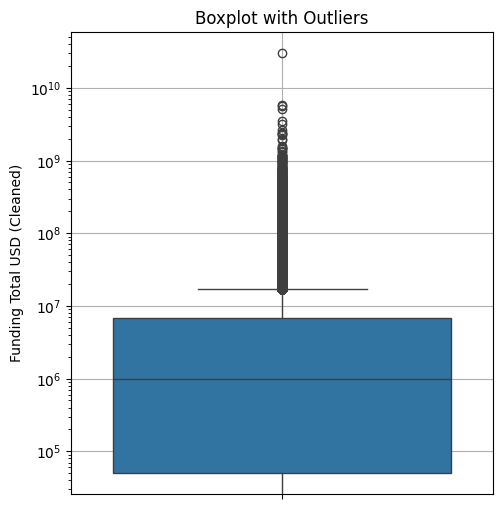

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['funding_total_usd_clean'])
plt.title('Boxplot with Outliers')
plt.ylabel('Funding Total USD (Cleaned)')
plt.yscale('log')
plt.grid(True)

In [14]:
data_no_outliers = df[(df['funding_total_usd_clean'] >= lower_bound) &
                        (df['funding_total_usd_clean'] <= upper_bound)]



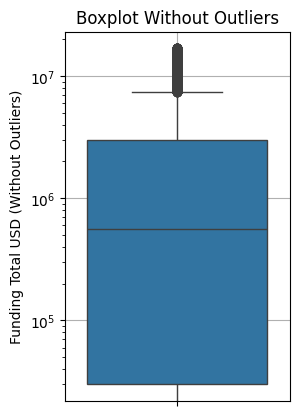

In [15]:
plt.subplot(1, 2, 2)
sns.boxplot(y=data_no_outliers['funding_total_usd_clean'])
plt.title('Boxplot Without Outliers')
plt.ylabel('Funding Total USD (Without Outliers)')
plt.yscale('log')
plt.grid(True)

### Xử lý Outlier Funding_rounds

In [22]:
column_to_check_round = 'funding_rounds'

In [18]:
Q1_round = df['funding_rounds'].quantile(0.25)
Q3_round = df['funding_rounds'].quantile(0.75)
IQR_round = Q3_round - Q1_round
lower_bound_round = Q1_round - 1.5 * IQR_round
upper_bound_round = Q3_round + 1.5 * IQR_round

In [23]:
outliers_round = df[(df[column_to_check_round] < (Q1_round - threshold * IQR_round)) | (df[column_to_check_round] > (Q3_round + threshold * IQR_round))]


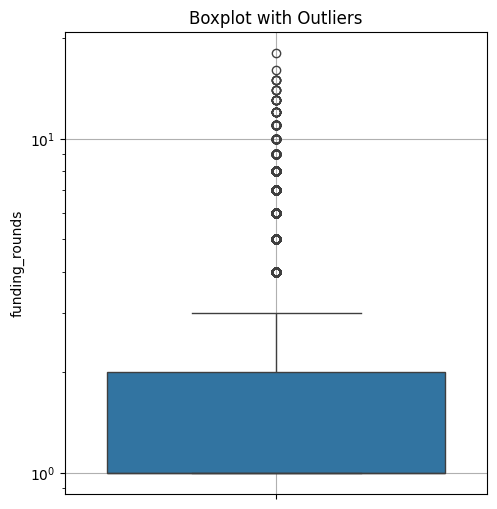

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['funding_rounds'])
plt.title('Boxplot with Outliers')
plt.ylabel('funding_rounds')
plt.yscale('log')
plt.grid(True)

In [25]:
data_no_outliers_round = df[(df['funding_rounds'] >= lower_bound_round) &
                        (df['funding_rounds'] <= upper_bound_round)]

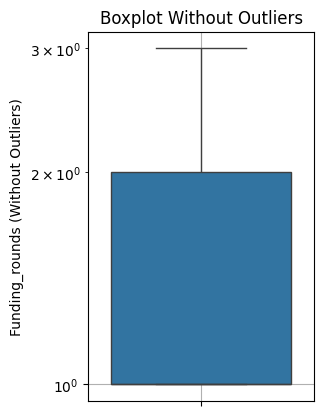

In [27]:
plt.subplot(1, 2, 2)
sns.boxplot(y=data_no_outliers_round['funding_rounds'])
plt.title('Boxplot Without Outliers')
plt.ylabel('Funding_rounds (Without Outliers)')
plt.yscale('log')
plt.grid(True)

### Xử lý Outlier cho Founded_year

In [29]:
column_to_check = 'founded_year'

In [30]:
Q1 = df['founded_year'].quantile(0.25)
Q3 = df['founded_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [31]:
outliers = df[(df[column_to_check] < (Q1 - threshold * IQR)) | (df[column_to_check] > (Q3 + threshold * IQR))]

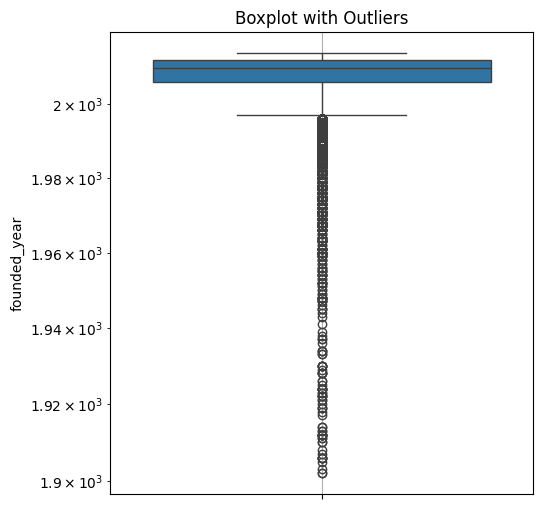

In [32]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['founded_year'])
plt.title('Boxplot with Outliers')
plt.ylabel('founded_year')
plt.yscale('log')
plt.grid(True)

In [33]:
data_no_outliers = df[(df['founded_year'] >= lower_bound) &
                        (df['founded_year'] <= upper_bound)]

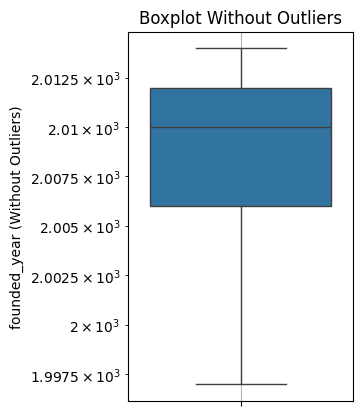

In [34]:
plt.subplot(1, 2, 2)
sns.boxplot(y=data_no_outliers['founded_year'])
plt.title('Boxplot Without Outliers')
plt.ylabel('founded_year (Without Outliers)')
plt.yscale('log')
plt.grid(True)

### Xử lý Outlier cho Venture

In [35]:
column_to_check_venture = 'venture'

In [36]:
Q1_venture = df['venture'].quantile(0.25)
Q3_venture = df['venture'].quantile(0.75)
IQR_venture = Q3_venture - Q1_venture
lower_bound_venture = Q1_venture - 1.5 * IQR_venture
upper_bound_venture = Q3_venture + 1.5 * IQR_venture

In [37]:
outliers_venture = df[(df[column_to_check_venture] < (Q1_venture - threshold * IQR_venture)) | (df[column_to_check_venture] > (Q3_venture + threshold * IQR_venture))]

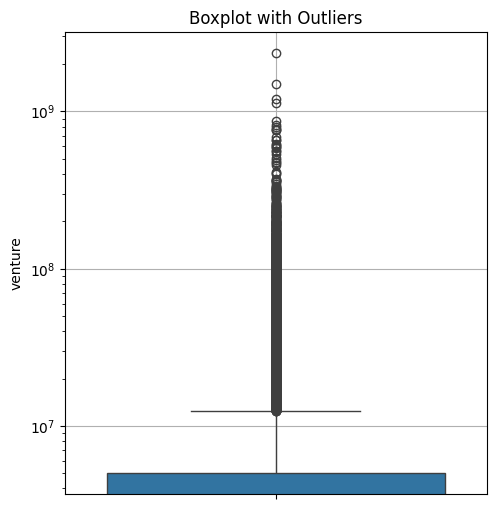

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['venture'])
plt.title('Boxplot with Outliers')
plt.ylabel('venture')
plt.yscale('log')
plt.grid(True)

In [39]:
data_trimmed_venture = df[(df['venture'] >= lower_bound_venture) & (df['venture'] <= upper_bound_venture)]

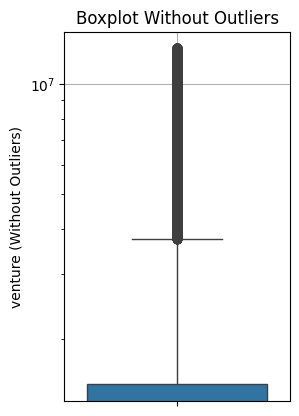

In [40]:
plt.subplot(1, 2, 2)
sns.boxplot(y=data_trimmed_venture['venture'])
plt.title('Boxplot Without Outliers')
plt.ylabel('venture (Without Outliers)')
plt.yscale('log')
plt.grid(True)